In [1]:
import pandas as pd
import numpy as np
import math

RANDOM_STATE = 123
np.random.seed(123)

## Load data

In [2]:
df_gym = pd.read_csv('data/gym_members_exercise_tracking.csv')
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
df_gym.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [4]:
df_gym.shape

(973, 15)

In [5]:
df_hr = pd.read_csv('data/heart_rate.csv')
df_hr.head()

,T1,T2,T3,T4
0,84.2697,91.4634,60.4839,59.2885
1,84.2697,91.4634,60.4839,59.2885
2,84.0619,91.1834,60.4606,59.2885
3,85.6542,91.8788,60.3391,58.8973
4,87.2093,91.1772,60.0762,58.4359


In [6]:
df_hr.isnull().sum()

T1      0
T2      0
T3    850
T4    909
dtype: int64

In [7]:
df_hr.shape

(1800, 4)

In [11]:
df_spotify_raw = pd.read_csv('data/Million Song Dataset kaggle/Music Info.csv')
df_spotify_raw.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [12]:
df_spotify_raw.isnull().sum()

track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                    1127
genre                  28335
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
dtype: int64

In [14]:
#df_spotify = df_spotify_raw.dropna()
df_spotify = df_spotify_raw
df_spotify.shape

(50683, 21)

## Synthetic data

### Obtain standard deviation

In [15]:
# Convert de dataframe columns into lists
subject_1 = df_hr.iloc[:, 0].tolist()
subject_2 = df_hr.iloc[:, 1].tolist()
subject_3 = df_hr.iloc[:, 2].tolist()
subject_4 = df_hr.iloc[:, 3].tolist()



#Remove nans from the lists
subject_1 = [x for x in subject_1 if str(x) != 'nan']
subject_2 = [x for x in subject_2 if str(x) != 'nan']
subject_3 = [x for x in subject_3 if str(x) != 'nan']
subject_4 = [x for x in subject_4 if str(x) != 'nan']

In [16]:
print('Measurements for subject 1:', len(subject_1))
print('Measurements for subject 2:', len(subject_2))
print('Measurements for subject 3:', len(subject_3))
print('Measurements for subject 4:', len(subject_4))

Measurements for subject 1: 1800
Measurements for subject 2: 1800
Measurements for subject 3: 950
Measurements for subject 4: 891


In [17]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [round(np.mean(subject_1), 2), round(np.max(subject_1), 2), round(np.min(subject_1), 2), round(np.std(subject_1), 2), ]
subject_2_data = [round(np.mean(subject_2), 2), round(np.max(subject_2), 2), round(np.min(subject_2), 2), round(np.std(subject_2), 2)]
subject_3_data = [round(np.mean(subject_3), 2), round(np.max(subject_3), 2), round(np.min(subject_3), 2), round(np.std(subject_3), 2)]
subject_4_data = [round(np.mean(subject_4), 2), round(np.max(subject_4), 2), round(np.min(subject_4), 2), round(np.std(subject_4), 2)]

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.head()


,Mean,Max,Min,Std
Subject 1,92.60,106.76,73.44,5.49
Subject 2,96.64,104.90,80.21,5.69
Subject 3,58.67,75.47,52.08,3.41
Subject 4,58.52,77.42,52.92,3.48


In [18]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [np.mean(subject_1), np.max(subject_1), np.min(subject_1), np.std(subject_1)]
subject_2_data = [np.mean(subject_2), np.max(subject_2), np.min(subject_2), np.std(subject_2)]
subject_3_data = [np.mean(subject_3), np.max(subject_3), np.min(subject_3), np.std(subject_3)]
subject_4_data = [np.mean(subject_4), np.max(subject_4), np.min(subject_4), np.std(subject_4)]

subject_1_data.append(subject_1_data[3]/(subject_1_data[1] - subject_1_data[0])) #Standard deviation represented as a its ratio of the range between the mean and maximum value
subject_2_data.append(subject_2_data[3]/(subject_2_data[1] - subject_2_data[0]))
subject_3_data.append(subject_3_data[3]/(subject_3_data[1] - subject_3_data[0]))
subject_4_data.append(subject_4_data[3]/(subject_4_data[1] - subject_4_data[0]))

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std', 'Std Ratio'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.round(2)

,Mean,Max,Min,Std,Std Ratio
Subject 1,92.60,106.76,73.44,5.49,0.39
Subject 2,96.64,104.90,80.21,5.69,0.69
Subject 3,58.67,75.47,52.08,3.41,0.20
Subject 4,58.52,77.42,52.92,3.48,0.18


In [19]:
mean_std_ratio_avg_max = df_subjects_data['Std Ratio'].mean()
print(mean_std_ratio_avg_max)

0.36578887474025085


In [20]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [np.mean(subject_1), np.max(subject_1), np.min(subject_1), np.std(subject_1)]
subject_2_data = [np.mean(subject_2), np.max(subject_2), np.min(subject_2), np.std(subject_2)]
subject_3_data = [np.mean(subject_3), np.max(subject_3), np.min(subject_3), np.std(subject_3)]
subject_4_data = [np.mean(subject_4), np.max(subject_4), np.min(subject_4), np.std(subject_4)]

subject_1_data.append(subject_1_data[3]/(subject_1_data[1] - subject_1_data[2])) #Standard deviation represented as a its ratio of the range between the minimum and maximum value
subject_2_data.append(subject_2_data[3]/(subject_2_data[1] - subject_2_data[2]))
subject_3_data.append(subject_3_data[3]/(subject_3_data[1] - subject_3_data[2]))
subject_4_data.append(subject_4_data[3]/(subject_4_data[1] - subject_4_data[2]))

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std', 'Std Ratio'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.round(2)

,Mean,Max,Min,Std,Std Ratio
Subject 1,92.60,106.76,73.44,5.49,0.16
Subject 2,96.64,104.90,80.21,5.69,0.23
Subject 3,58.67,75.47,52.08,3.41,0.15
Subject 4,58.52,77.42,52.92,3.48,0.14


In [21]:
mean_std_ratio_min_max = df_subjects_data['Std Ratio'].mean()
print(mean_std_ratio_min_max)

0.17072102970888003


The mean ratio of the standar deviation with respect to the interval between average and maximum heart rate values is 36.58% and between minimum and maximum is 17.07%.

### Generate synthetic data

In [22]:
from scipy.stats import truncnorm

def genarate_heart_rates_truncnorm(min_val, max_val, avg, std, N):
    a = (min_val - avg) / std
    b = (max_val - avg) / std

    genarated_heart_rates = truncnorm.rvs(a, b, loc=avg, scale=std, size=N)

    return genarated_heart_rates

In [23]:
from scipy.stats import beta

def beta_params(min_val, max_val, avg, std):
    # Calculate α and β params of Beta distribution
    scale = max_val - min_val
    mu = (max_val - min_val) / scale  # Media en [0,1]
    sigma2 = (std / scale) ** 2  # Varianza en [0,1]
    
    # Equations for α and β from mean and variance
    alpha = mu * ((mu * (1 - mu)) / sigma2 - 1)
    beta_param = (1 - mu) * ((mu * (1 - mu)) / sigma2 - 1)
    
    return alpha, beta_param

def genarate_heart_rates_beta_old(min_val, max_val, avg, std, N):
    # Generate random numbers with Beta distribution scaled to [min, max]
    alpha, beta_param = beta_params(min_val, max_val, avg, std)
    
    if alpha <= 0 or beta_param <= 0:
        raise ValueError("The parameters α and β must be positive. Check the mean and standard deviation.")
    
    # Generar valores Beta en [0,1] y escalar al rango [minimo, maximo]
    numbers = beta.rvs(alpha, beta_param, size=N)
    numbers = min_val + numbers * (max_val - min_val)
    
    return numbers

In [24]:
import scipy.stats
import matplotlib.pyplot as plt

def my_distribution(min_val, max_val, mean, std):
    scale = max_val - min_val
    location = min_val
    # Mean and standard deviation of the unscaled beta distribution
    unscaled_mean = (mean - min_val) / scale
    unscaled_var = (std / scale) ** 2
    # Computation of alpha and beta can be derived from mean and variance formulas
    t = unscaled_mean / (1 - unscaled_mean)
    beta = ((t / unscaled_var) - (t * t) - (2 * t) - 1) / ((t * t * t) + (3 * t * t) + (3 * t) + 1)
    alpha = beta * t
    # Not all parameters may produce a valid distribution
    if alpha <= 0 or beta <= 0:
        raise ValueError('Cannot create distribution for the given parameters.')
    # Make scaled beta distribution with computed parameters
    return scipy.stats.beta(alpha, beta, scale=scale, loc=location)

def genarate_heart_rates_beta(min_val, max_val, avg, std, N, plot=False):
    my_dist = my_distribution(min_val, max_val, avg, std)
    
    generated_numbers = my_dist.rvs(size=N)
    if plot:  
        x = np.linspace(min_val, max_val, 100)
        plt.plot(x, my_dist.pdf(x))
    return generated_numbers

In [25]:
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Min: 60, Max: 180, Avg: 157, Std: 8.41314411902577, N: 101
Using truncated normal distribution
Generated average: 157.08
Generated std: 6.74
Generated min: 138.98
Generated max: 177.36


Using beta distribution
Generated average: 157.18
Generated std: 7.91
Generated min: 130.00
Generated max: 174.10


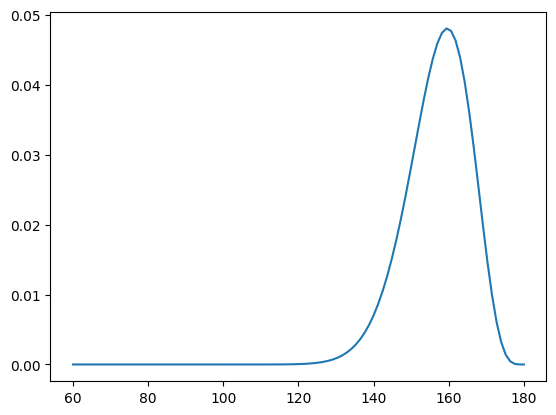

In [26]:
min_val, max_val, avg, N = df_gym.iloc[0]['Resting_BPM'], df_gym.iloc[0]['Max_BPM'], df_gym.iloc[0]['Avg_BPM'], math.trunc(df_gym.iloc[0]['Session_Duration (hours)'] * 60)
std = mean_std_ratio_avg_max * (max_val - avg)
print(f"Min: {min_val}, Max: {max_val}, Avg: {avg}, Std: {std}, N: {N}")


genarated_heart_rates_truncnorm = genarate_heart_rates_truncnorm(min_val, max_val, avg, std, N)

print("Using truncated normal distribution")
print(f"Generated average: {np.mean(genarated_heart_rates_truncnorm):.2f}")
print(f"Generated std: {np.std(genarated_heart_rates_truncnorm, ddof=1):.2f}")
print(f"Generated min: {np.min(genarated_heart_rates_truncnorm):.2f}")
print(f"Generated max: {np.max(genarated_heart_rates_truncnorm):.2f}")

genarated_heart_rates_beta = genarate_heart_rates_beta(min_val, max_val, avg, std, N, True)

print("\n\nUsing beta distribution")
print(f"Generated average: {np.mean(genarated_heart_rates_beta):.2f}")
print(f"Generated std: {np.std(genarated_heart_rates_beta, ddof=1):.2f}")
print(f"Generated min: {np.min(genarated_heart_rates_beta):.2f}")
print(f"Generated max: {np.max(genarated_heart_rates_beta):.2f}")


Min: 60, Max: 180, Avg: 157, Std: 8.41314411902577, N: 101
Real average: 158.22
Real std: 8.25
Real min: 137.78
Real max: 174.99


Min: 66, Max: 179, Avg: 151, Std: 10.242088492727024, N: 78
Real average: 152.38
Real std: 8.99
Real min: 128.98
Real max: 169.93




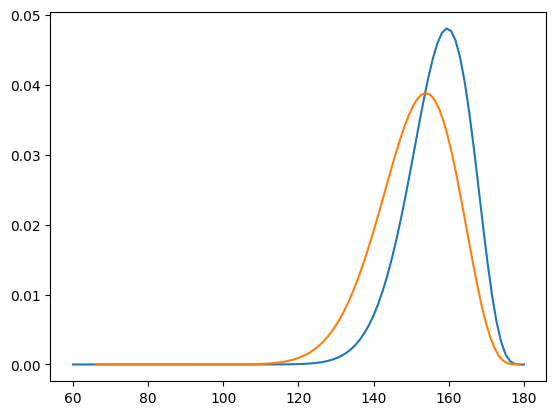

In [27]:
for index, row in df_gym.head(2).iterrows():
    min_val, max_val, avg, N = row['Resting_BPM'], row['Max_BPM'], row['Avg_BPM'], math.trunc(row['Session_Duration (hours)'] * 60)
    std = mean_std_ratio_avg_max * (max_val - avg)
    
    try:
        genarated_heart_rates_session = genarate_heart_rates_beta(min_val, max_val, avg, std, N, True)

        print(f"Min: {min_val}, Max: {max_val}, Avg: {avg}, Std: {std}, N: {N}")
        
        print(f"Real average: {np.mean(genarated_heart_rates_session):.2f}")
        print(f"Real std: {np.std(genarated_heart_rates_session, ddof=1):.2f}")
        print(f"Real min: {np.min(genarated_heart_rates_session):.2f}")
        print(f"Real max: {np.max(genarated_heart_rates_session):.2f}")

        print('\n')
    except Exception as e:
        print(f"Error for index {index}: {e}")
        continue


## First model - Fuzzy Logic

In [28]:
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [29]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [30]:
genarated_heart_rates_session

array([165.76347164, 157.84253548, 158.07592418, 152.95938501,
       165.71058747, 160.84408686, 163.27998103, 169.93440615,
       147.02613348, 155.92851297, 148.62931468, 150.60196416,
       159.23802144, 145.70582142, 147.52068422, 155.30213719,
       153.36243878, 146.81129064, 158.99786818, 161.15461295,
       142.82156294, 150.7818965 , 142.11546849, 148.46759468,
       139.27406205, 152.98742174, 163.30232399, 146.098549  ,
       148.5889595 , 138.99737594, 140.20057992, 149.8158085 ,
       159.92771749, 152.14603505, 160.43430639, 142.20250821,
       139.18356028, 153.39991641, 150.58556054, 159.99973844,
       150.37669143, 168.48974381, 144.37649765, 142.6680673 ,
       159.11748098, 160.91680429, 155.21713525, 166.98561292,
       158.71579268, 146.79069861, 157.61221379, 165.40461274,
       146.38415496, 156.44346623, 136.72069331, 128.97784911,
       150.79125273, 156.58861947, 131.75693615, 147.11741685,
       163.99032147, 142.3351167 , 152.50211991, 149.81

In [31]:
bpm_antecedent = ctrl.Antecedent(np.arange(30, 201, 1), 'BPM')
bpm_variation_antecedent = ctrl.Antecedent(np.arange(-30, 31, 1), 'BPM Variation')
intensity_consequent = ctrl.Consequent(np.arange(0, 101, 1), 'Intensity')

In [32]:
bpm_antecedent.automf(5, names=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
bpm_variation_antecedent.automf(3, names=['Negative', 'Zero', 'Positive'])
intensity_consequent.automf(3, names=['Low', 'Medium', 'High'])

c:\Users\Dani\.conda\envs\Master-IA\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


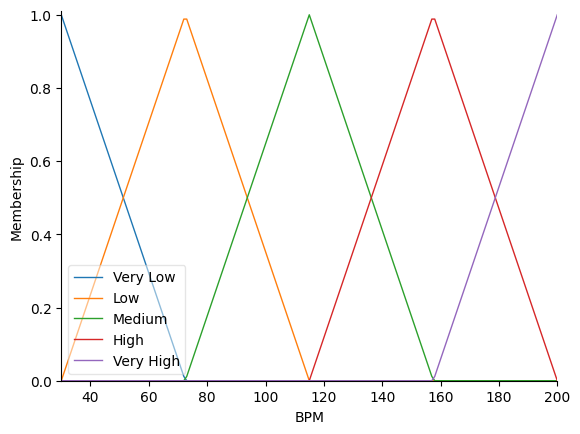

In [33]:
bpm_antecedent.view()

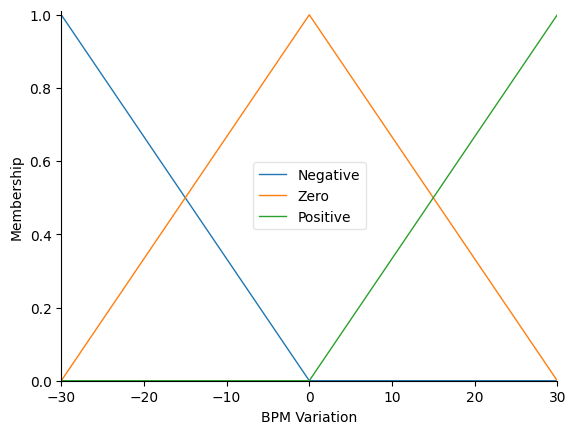

In [34]:
bpm_variation_antecedent.view()

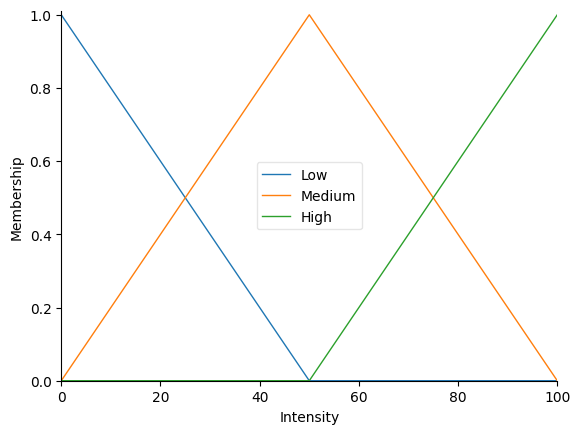

In [35]:
intensity_consequent.view()

In [36]:
# rule1 = ctrl.Rule(bpm_antecedent['Very Low'] , intensity_consequent['High'])
# rule2 = ctrl.Rule(bpm_antecedent['Low'], bpm_variation_antecedent['Negative'], intensity_consequent['High'])
# rule3 = ctrl.Rule(bpm_antecedent['Low'], bpm_variation_antecedent['Zero'], intensity_consequent['High'])
# rule4 = ctrl.Rule(bpm_antecedent['Low'], bpm_variation_antecedent['Positive'], intensity_consequent['Medium'])
# rule5 = ctrl.Rule(bpm_antecedent['Medium'], bpm_variation_antecedent['Negative'], intensity_consequent['High'])
# rule6 = ctrl.Rule(bpm_antecedent['Medium'], bpm_variation_antecedent['Zero'], intensity_consequent['Medium'])
# rule7 = ctrl.Rule(bpm_antecedent['Medium'], bpm_variation_antecedent['Positive'], intensity_consequent['Low'])
# rule8 = ctrl.Rule(bpm_antecedent['High'], bpm_variation_antecedent['Negative'], intensity_consequent['Medium'])
# rule9 = ctrl.Rule(bpm_antecedent['High'], bpm_variation_antecedent['Zero'], intensity_consequent['Low'])
# rule10 = ctrl.Rule(bpm_antecedent['High'], bpm_variation_antecedent['Positive'], intensity_consequent['Low'])
# rule11 = ctrl.Rule(bpm_antecedent['Very High'], intensity_consequent['Low'])

rule1 = ctrl.Rule(antecedent= (bpm_antecedent['Very Low'] |
                        (bpm_antecedent['Low'] & bpm_variation_antecedent['Negative']) |
                        (bpm_antecedent['Low'] & bpm_variation_antecedent['Zero']) |
                        (bpm_antecedent['Medium'] & bpm_variation_antecedent['Negative'])),
                        consequent=intensity_consequent['High'])
rule2 = ctrl.Rule(antecedent=((bpm_antecedent['Low'] & bpm_variation_antecedent['Positive']) |
                        (bpm_antecedent['Medium'] & bpm_variation_antecedent['Zero']) |
                        (bpm_antecedent['High'] & bpm_variation_antecedent['Negative'])),
                        consequent=intensity_consequent['Medium'])
rule3 = ctrl.Rule(antecedent=((bpm_antecedent['Medium'] & bpm_variation_antecedent['Positive']) |
                        (bpm_antecedent['High'] & bpm_variation_antecedent['Zero']) |
                        (bpm_antecedent['High'] & bpm_variation_antecedent['Positive'])),
                        consequent=intensity_consequent['Low'])

In [37]:
intensity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
intensity_sim = ctrl.ControlSystemSimulation(intensity_ctrl)

In [38]:
def calculate_intensity_fuzzy(bpm, bpm_variation, plot_consequent=False, plot_antecedent=False):
    intensity_sim.input['BPM'] = bpm
    intensity_sim.input['BPM Variation'] = bpm_variation
    intensity_sim.compute()
    if plot_consequent:
        intensity_consequent.view(sim=intensity_sim)
    if plot_antecedent:
        bpm_antecedent.view(sim=intensity_sim)
        bpm_variation_antecedent.view(sim=intensity_sim)
    return intensity_sim.output['Intensity']

#### Basic example

np.float64(47.384170156698524)

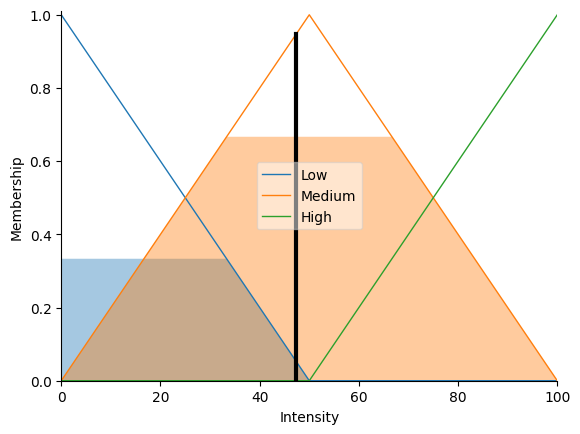

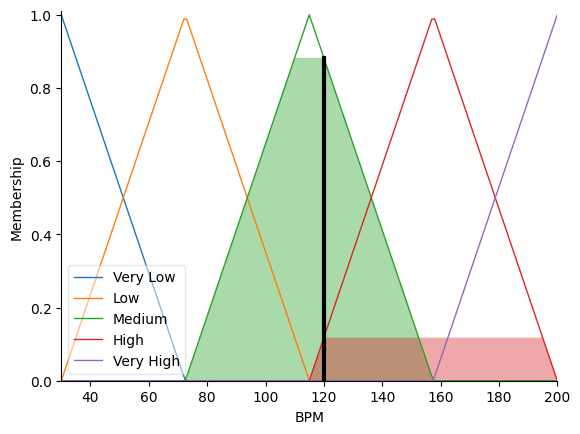

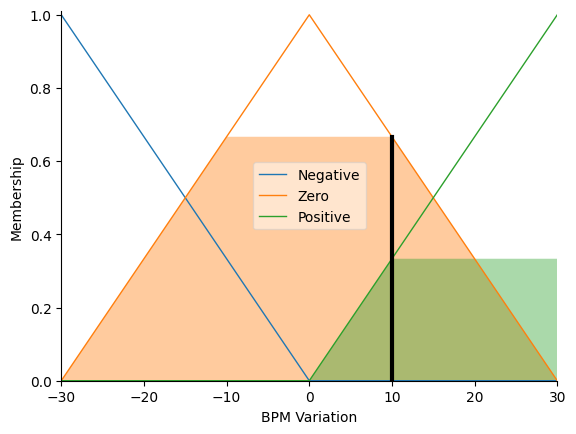

In [39]:
bpm = 120
bpm_variation = 10
calculate_intensity_fuzzy(bpm, bpm_variation, plot_consequent = True, plot_antecedent = True)

np.float64(75.45998530595496)

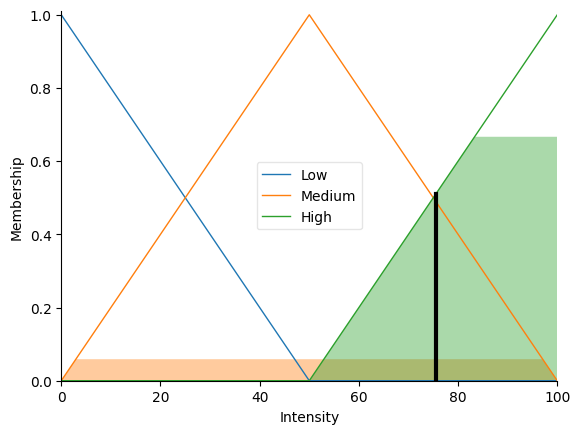

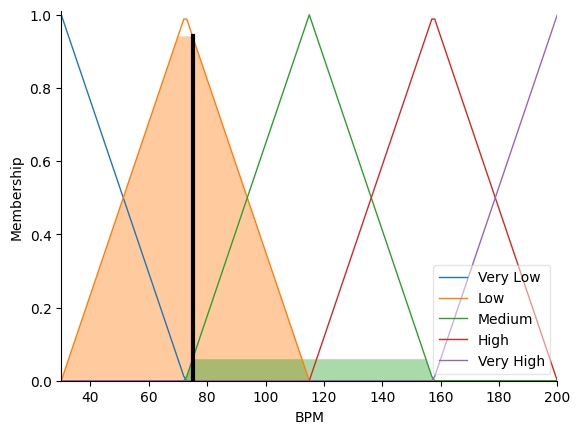

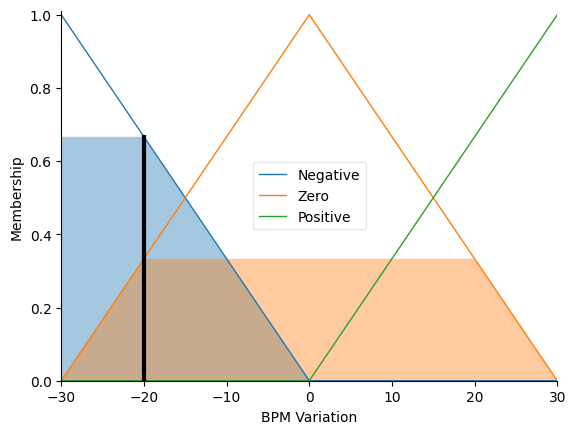

In [40]:
bpm = 75
bpm_variation = -20
calculate_intensity_fuzzy(bpm, bpm_variation, plot_consequent = True, plot_antecedent = True)

#### Dataset example

In [41]:
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [42]:
def calculate_session_moment_intensity(generated_bpms, minute, print_values=False, plot_consequent=False, plot_antecedent=False):
    bpm_registered = generated_bpms[minute]
    if minute == 0:
        bpm_variation = 0
    else:
        last_bpm = genarated_heart_rates_session[minute - 1]
        bpm_variation = bpm_registered - last_bpm

    if print_values:
        print(f"Minute analized: {minute}")
        print(f"BPM registered: {bpm_registered}")
        print(f"Last BPM: {last_bpm}")
        print(f"BPM variation: {bpm_variation}")
    
    intensity = calculate_intensity_fuzzy(bpm_registered, bpm_variation, plot_consequent, plot_antecedent)
    if print_values:
        print(f"Intensity: {intensity}")
    return intensity

In [43]:
session_analized = df_gym.iloc[2]
session_analized['Workout_Type']

'Cardio'

Min: 54, Max: 167, Avg: 122, Std: 16.46049936331129, N: 66
Real average: 122.77
Real std: 18.65
Real min: 81.49
Real max: 156.98




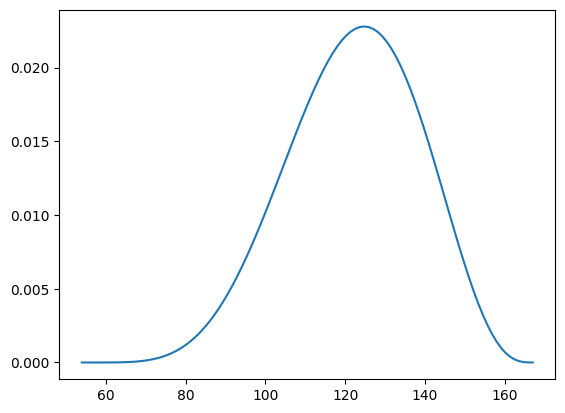

In [44]:
min_val, max_val, avg, N = session_analized['Resting_BPM'], session_analized['Max_BPM'], session_analized['Avg_BPM'], math.trunc(session_analized['Session_Duration (hours)'] * 60)
std = mean_std_ratio_avg_max * (max_val - avg)

try:
    genarated_heart_rates_session = genarate_heart_rates_beta(min_val, max_val, avg, std, N, True)

    print(f"Min: {min_val}, Max: {max_val}, Avg: {avg}, Std: {std}, N: {N}")
    
    print(f"Real average: {np.mean(genarated_heart_rates_session):.2f}")
    print(f"Real std: {np.std(genarated_heart_rates_session, ddof=1):.2f}")
    print(f"Real min: {np.min(genarated_heart_rates_session):.2f}")
    print(f"Real max: {np.max(genarated_heart_rates_session):.2f}")

    print('\n')
except Exception as e:
    print(f"Error for index {index}: {e}")

In [45]:
genarated_heart_rates_session

array([137.9994604 , 105.26451654, 126.09230001, 123.80809677,
       124.38219133, 147.78767639, 136.96664357, 124.15176477,
       148.43552304, 103.14379277, 152.9002033 , 102.86119188,
       125.11008856, 108.28159123, 117.37715439, 132.49156869,
       122.03737481, 136.88216193,  84.39084636, 108.74255686,
       125.57248231, 103.1364639 , 117.94039918,  92.64502349,
       135.84297663, 126.12972141,  94.92487822, 135.16433751,
       135.7561488 , 126.59831139, 106.63463964,  85.67930854,
       141.10419993, 142.28319166, 127.73018067,  93.48791643,
       132.23184591, 108.49889176, 124.28290345, 116.3842251 ,
       110.64544343, 137.46288091, 116.45304578, 140.67199686,
       145.17741112, 131.79070385, 150.67798847,  92.33339807,
       115.98530243, 140.84672925, 118.11075605, 148.48481668,
       147.18259133,  81.49398312, 117.47356252, 141.79893834,
       108.55941947, 143.77455183, 121.71569879,  99.61855232,
       114.40458276, 106.12385242, 156.98059506, 111.41

In [46]:
# Valor objetivo
target_value = 154.69513211

# Encontrar la posición del valor más cercano
closest_index = np.abs(genarated_heart_rates_session - target_value).argmin()
closest_value = genarated_heart_rates_session[closest_index]

print(f"Posición más cercana: {closest_index}")
print(f"Valor más cercano: {closest_value}")

Posición más cercana: 10
Valor más cercano: 152.90020330068634


Minute analized: 15
BPM registered: 132.49156869241892
Last BPM: 117.37715439440612
BPM variation: 15.114414298012804
Intensity: 43.951801538057225


c:\Users\Dani\.conda\envs\Master-IA\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


np.float64(43.951801538057225)

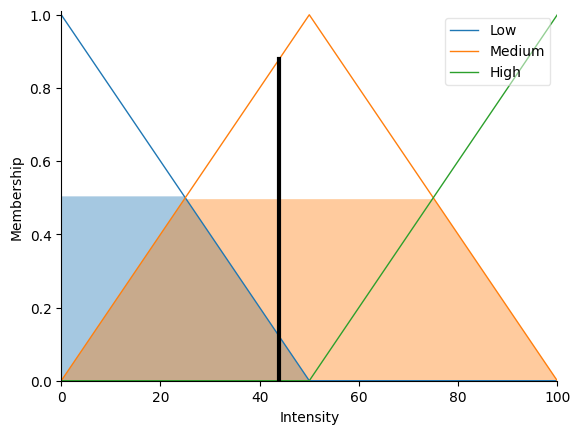

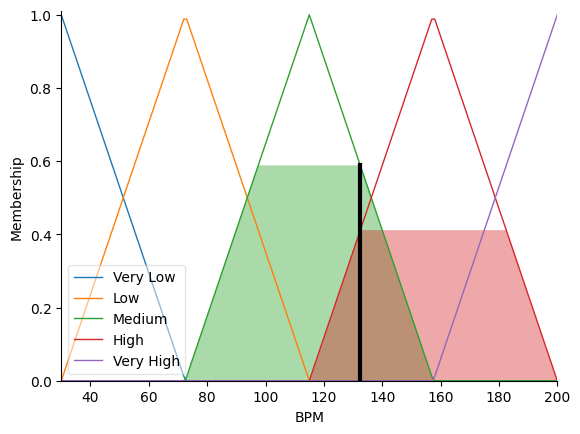

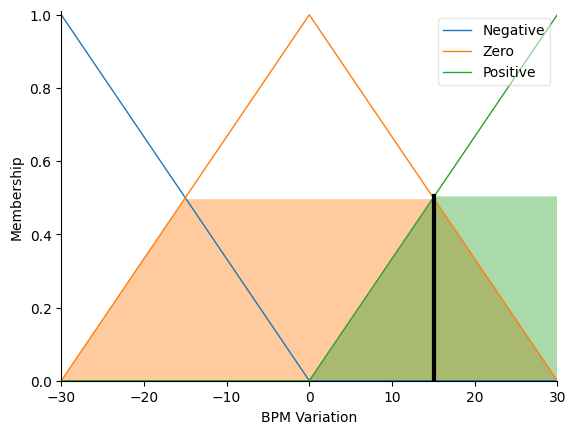

In [47]:
calculate_session_moment_intensity(genarated_heart_rates_session, minute = 15, print_values=True, plot_consequent = True, plot_antecedent = True)

Minute analized: 20
BPM registered: 125.57248230998022
Last BPM: 108.74255686193112
BPM variation: 16.829925448049096
Intensity: 42.40864351679399


np.float64(42.40864351679399)

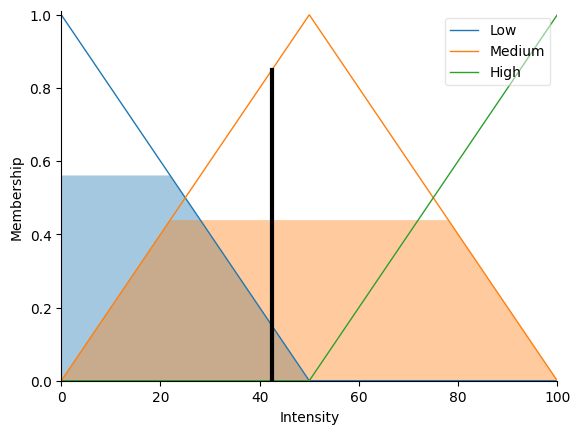

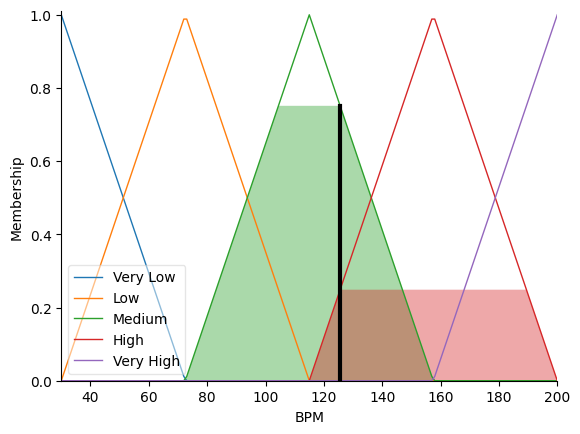

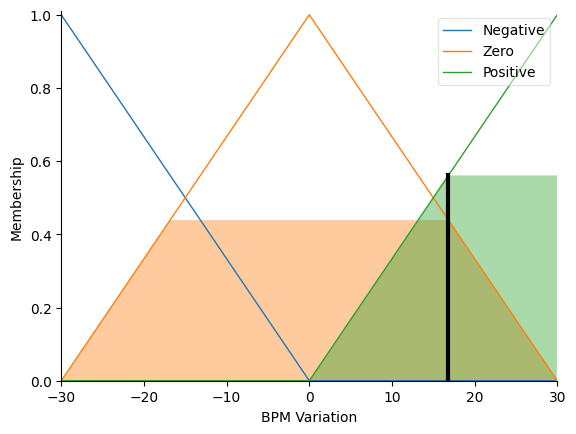

In [48]:
calculate_session_moment_intensity(genarated_heart_rates_session, minute = 20, print_values=True, plot_consequent = True, plot_antecedent = True)

Minute analized: 53
BPM registered: 81.49398311781364
Last BPM: 147.1825913300649
BPM variation: -65.68860821225125
Intensity: 82.71729537997807


np.float64(82.71729537997807)

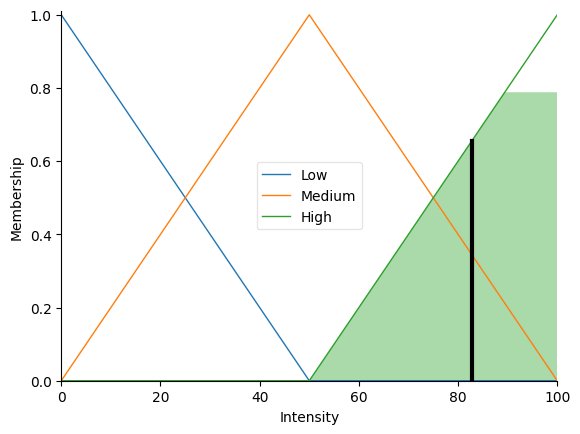

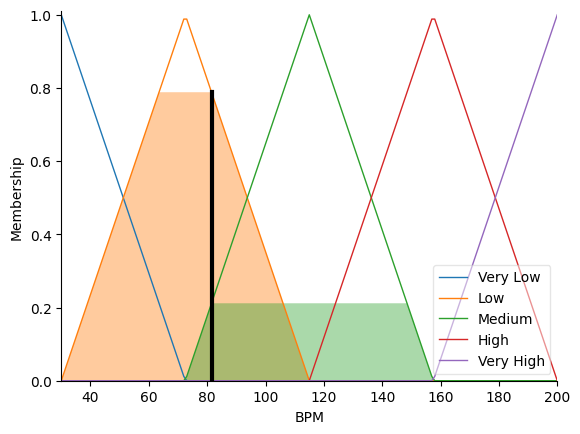

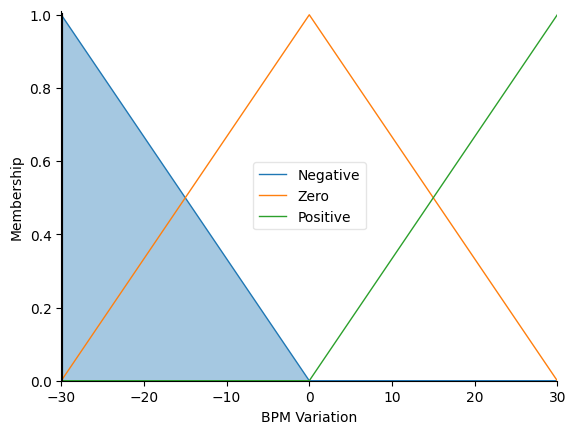

In [49]:
calculate_session_moment_intensity(genarated_heart_rates_session, minute = 53, print_values=True, plot_consequent = True, plot_antecedent = True)

## Second model - Kmeans

TODO:
- Ver aproximaciones hídridas (collaborative filtering y content-based filtering)

In [51]:
def get_song_cluster(df, song_id, using_id=True):
    if using_id:
        song = df[df['track_id'] == song_id]
    else:
        song = df[df['track_name'] == song_id]
    
    if song.empty:
        return None
    else:
        return int(song.iloc[0]['Cluster'])
    
def get_most_common_cluster(df, song_id_list, using_id=True):
    cluster_counts = {}
    for song_id in song_id_list:
        cluster = get_song_cluster(df, song_id, using_id)
        if cluster is not None:
            if cluster in cluster_counts:
                cluster_counts[cluster] += 1
            else:
                cluster_counts[cluster] = 1
    return max(cluster_counts, key=cluster_counts.get) if cluster_counts else None


def get_recommended_songs(df, energy_level, song_id_list, using_id=True):
    energy_difs = []
    cluster = get_most_common_cluster(df, song_id_list, using_id)
    if cluster is not None:
        songs_in_cluster = df[df['Cluster'] == cluster]
        for _, row in songs_in_cluster.iterrows():
            dif = abs(row['energy'] - energy_level)
            energy_difs.append(dif)
        songs_in_cluster['Energy Dif'] = energy_difs
        songs_in_cluster = songs_in_cluster.sort_values(by='Energy Dif')
        return songs_in_cluster.head(5)
    return None


In [53]:
used_features = ['danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']#, 'energy']
X = df_spotify[used_features]

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.77465639,  0.86431996, -0.01871828, -0.70206668, -0.66840546,
        -0.74633372,  0.83070987],
       [-0.47270445,  0.86146176, -0.55814479, -0.70333136, -0.66840546,
         0.84190729,  1.7190036 ],
       [ 0.08087409,  0.55145719, -0.47394163, -0.70541823, -0.66704363,
         0.42455929, -0.1180143 ],
       [-1.19962577, -0.12307757, -0.51209619, -0.7047116 , -0.66646211,
         0.21974962, -0.63967418],
       [ 0.12001601, -0.36140732, -0.51472754, -0.67231553, -0.66798712,
        -1.27188305, -1.06906792]])

### Dimensionality reduction - PCA

#### 2 dimensions

In [55]:
from sklearn.decomposition import PCA

Test with 2 dimensions for better cluster visualitation

In [56]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_reduced_2d = pca.transform(X_scaled)
X_reduced_2d[:5]

array([[ 0.69198454, -1.51586552],
       [ 1.54024537, -0.7491246 ],
       [ 0.97958009,  0.04886138],
       [ 0.04561504, -0.45485456],
       [-0.44907914, -0.15758911]])

We obtain the best number of clusters using the elbow method and Davies-Bouldin index

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
max_k = 12

wcss, db, silh = [], [], []

for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans.fit(X_reduced_2d)
    wcss.append(kmeans.inertia_)
    
    #Davies-Bouldin score
    db.append(davies_bouldin_score(X_reduced_2d, kmeans.labels_))

    #Silhouette score
    #silh.append(silhouette_score(X_reduced_2d, kmeans.labels_))



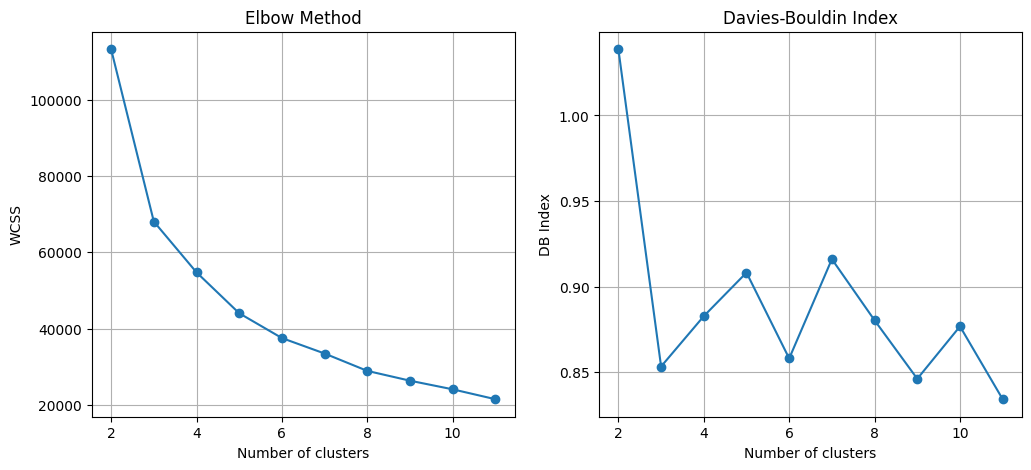

In [58]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_k), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(range(2, max_k), db, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')
plt.grid()
plt.show()

Observing the graphs we select 7 clusters

In [59]:
kmeans_reduced_2d = KMeans(n_clusters=9, random_state=RANDOM_STATE)
df_spotify_kmeans_2d = df_spotify.copy()
df_spotify_kmeans_2d['Cluster'] = kmeans_reduced_2d.fit_predict(X_reduced_2d)
df_spotify_kmeans_2d.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Cluster
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4,0
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4,3
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4,3
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4,1
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4,1


In [60]:
df_spotify_kmeans_2d['Cluster'].value_counts()

Cluster
3    8597
1    7919
7    6898
8    6198
0    6012
6    4538
5    4382
2    3717
4    2422
Name: count, dtype: int64

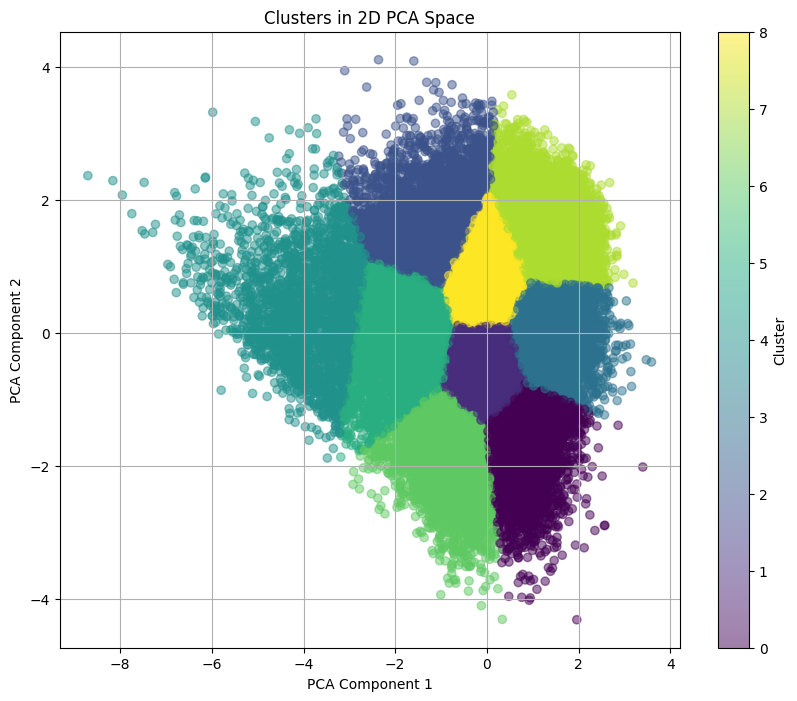

In [61]:
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], c=df_spotify_kmeans_2d['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [62]:
df_spotify_kmeans_2d.head(20)

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Cluster
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4,0
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4,3
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4,3
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4,1
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4,1
5,TRUMISQ128F9340BEE,Somebody Told Me,The Killers,https://p.scdn.co/mp3-preview/0d07673cfb46218a...,0FNmIQ7u45Lhdn6RHhSLix,"rock, alternative, indie, pop, alternative_roc...",NaN,2005,198480,0.508,...,-4.289,0,0.0847,0.000087,0.000643,0.0641,0.704,138.030,4,3
6,TRVCCWR128F9304A30,Viva la Vida,Coldplay,https://p.scdn.co/mp3-preview/ab747fed1bfab2ac...,08A1lZeyLMWH58DT6aYjnC,"rock, alternative, indie, pop, alternative_roc...",NaN,2013,235384,0.588,...,-7.903,1,0.1050,0.153000,0.000000,0.0634,0.520,137.973,4,3
7,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...,01puceOqImrzSfKDAcd1Ia,"rock, alternative, indie, alternative_rock, in...",NaN,1996,264066,0.360,...,-9.129,1,0.0260,0.062600,0.000092,0.1720,0.317,74.807,4,1
8,TRMZXEW128F9341FD5,The Scientist,Coldplay,https://p.scdn.co/mp3-preview/95cb9df1b056d759...,0GSSsT9szp0rJkBrYkzy6s,"rock, alternative, indie, pop, alternative_roc...",Rock,2007,311014,0.566,...,-7.826,1,0.0242,0.715000,0.000014,0.1200,0.173,146.365,4,8
9,TRUJIIV12903CA8848,Clocks,Coldplay,https://p.scdn.co/mp3-preview/24c7fe858b234e3c...,0BCPKOYdS2jbQ8iyB56Zns,"rock, alternative, indie, pop, alternative_roc...",NaN,2002,307879,0.577,...,-7.215,0,0.0279,0.599000,0.011500,0.1830,0.255,130.970,4,8


In [73]:
features_to_show = ['track_id', 'name', 'Cluster', 'energy','Energy Dif'] + used_features 
features_to_show

['track_id',
 'name',
 'Cluster',
 'energy',
 'Energy Dif',
 'danceability',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'valence',
 'tempo']

In [74]:
print('Cluster:', get_most_common_cluster(df_spotify_kmeans_2d, ['TRDKPRZ128F92F37EA', 'TRCSXPV128F425E2F7', 'TRFNTDZ128F426B34D', 'TRAJBOD128F9303DCD'], using_id=True))
recommendations = get_recommended_songs(df_spotify_kmeans_2d, 0.5, ['TRDKPRZ128F92F37EA', 'TRCSXPV128F425E2F7', 'TRFNTDZ128F426B34D', 'TRAJBOD128F9303DCD'])
recommendations[features_to_show]

Cluster: 3


C:\Users\Dani\AppData\Local\Temp\ipykernel_14788\2131376290.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_in_cluster['Energy Dif'] = energy_difs


,track_id,name,Cluster,energy,Energy Dif,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo
3552,TRAPGVB128F42848E0,Hide U,3,0.501,0.001,0.663,-11.447,0.0703,0.018300,0.016000,0.382,170.091
19845,TRVNHGS128F92F2065,Lay Your World on Me,3,0.499,0.001,0.579,-6.285,0.0285,0.011200,0.000000,0.367,124.969
24720,TRDPXKD128F1499EF3,Bound For The Floor,3,0.499,0.001,0.626,-7.438,0.0565,0.000163,0.000781,0.618,119.191
15028,TREEFKS128F4287BFC,West Savannah,3,0.501,0.001,0.838,-6.730,0.4840,0.012200,0.000000,0.355,85.005
22204,TREWOIB128F14AA138,ATM,3,0.498,0.002,0.772,-7.661,0.6490,0.115000,0.000000,0.351,81.817


In [77]:
get_most_common_cluster(df_spotify_kmeans_2d, ['TRDKPRZ128F92F37EA', 'TRCSXPV128F425E2F7', 'TRFNTDZ128F426B34D', 'TRAJBOD128F9303DCD'], using_id=True)

3

In [78]:
df_spotify['energy']

0        0.918
1        0.892
2        0.826
3        0.664
4        0.430
         ...  
50678    0.933
50679    0.693
50680    0.975
50681    0.902
50682    0.953
Name: energy, Length: 50683, dtype: float64

#### Optimal dimensions

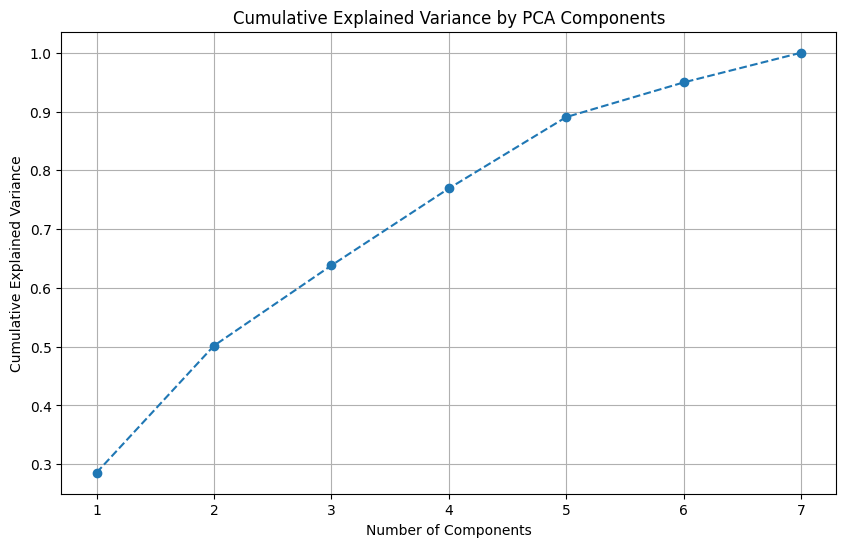

In [79]:
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [80]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
X_reduced_opt = pca.transform(X_scaled)
X_reduced_opt[:5]

array([[ 0.69198454, -1.51586552, -0.34879966, -0.18582175, -0.70209571],
       [ 1.54024537, -0.7491246 , -1.12864598,  0.93789293, -0.80597071],
       [ 0.97958009,  0.04886138, -0.61507839, -0.51364278, -0.09074719],
       [ 0.04561504, -0.45485456, -0.57739686, -1.00992945, -0.36767795],
       [-0.44907914, -0.15758911, -0.22799476, -1.49340474,  0.02085038]])

In [81]:
max_k = 12

wcss, db, silh = [], [], []

for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans.fit(X_reduced_opt)
    wcss.append(kmeans.inertia_)
    
    #Davies-Bouldin score
    db.append(davies_bouldin_score(X_reduced_opt, kmeans.labels_))

    #Silhouette score
    #silh.append(silhouette_score(X_reduced_opt, kmeans.labels_))

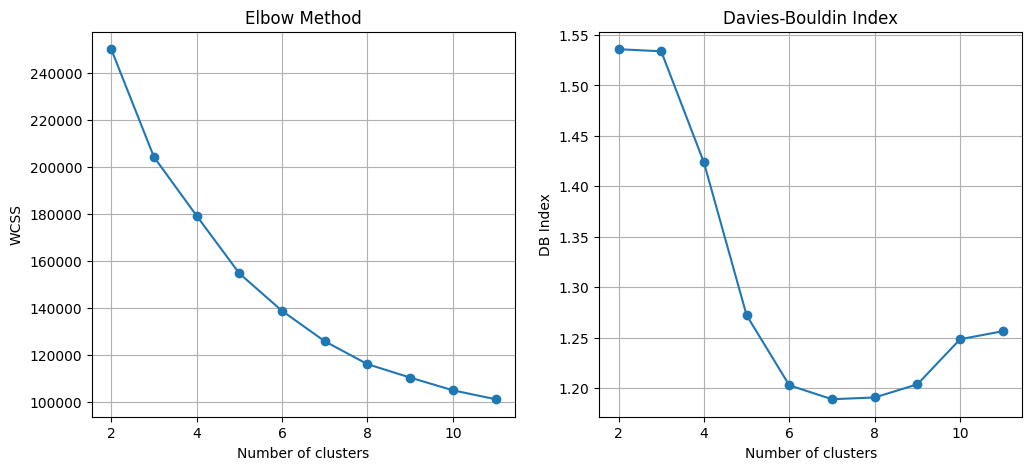

In [82]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_k), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(range(2, max_k), db, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')
plt.grid()
plt.show()

In [83]:
kmeans_reduced_opt = KMeans(n_clusters=6, random_state=RANDOM_STATE)
df_spotify_kmeans_opt = df_spotify.copy()
df_spotify_kmeans_opt['Cluster'] = kmeans_reduced_opt.fit_predict(X_reduced_opt)
df_spotify_kmeans_opt.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Cluster
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4,5
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4,5
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4,2
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4,2
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4,2


In [84]:
df_spotify_kmeans_opt['Cluster'].value_counts()

Cluster
1    13084
2    11096
5     8785
3     8261
4     7142
0     2315
Name: count, dtype: int64

In [85]:
df_spotify_kmeans_opt.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Cluster
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4,5
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4,5
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4,2
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4,2
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4,2


In [88]:
print('Cluster:', get_most_common_cluster(df_spotify_kmeans_2d, ['TRDKPRZ128F92F37EA', 'TRCSXPV128F425E2F7', 'TRFNTDZ128F426B34D', 'TRAJBOD128F9303DCD'], using_id=True))
recommendations = get_recommended_songs(df_spotify_kmeans_2d, 0.76, ['TRDKPRZ128F92F37EA', 'TRCSXPV128F425E2F7', 'TRFNTDZ128F426B34D', 'TRAJBOD128F9303DCD'])
recommendations[features_to_show]

Cluster: 3


C:\Users\Dani\AppData\Local\Temp\ipykernel_14788\2131376290.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_in_cluster['Energy Dif'] = energy_difs


,track_id,name,Cluster,energy,Energy Dif,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo
32965,TRYWYCR128F9346D2B,Dead And Gone,3,0.76,0.0,0.711,-5.053,0.2800,0.046000,0.000000,0.436,134.993
29585,TRJHZFW128F42827E5,Pogo (Shinichi Osawa Remix),3,0.76,0.0,0.578,-5.865,0.0441,0.000079,0.015000,0.575,136.059
38585,TRXMQYM128F4289C89,No One Needs To Know,3,0.76,0.0,0.505,-6.198,0.0512,0.133000,0.000000,0.471,123.713
42,TRSXCET128F92EB269,I Kissed a Girl,3,0.76,0.0,0.699,-3.173,0.0677,0.002230,0.000000,0.696,129.996
31983,TREUITQ12903D05934,Lido Shuffle,3,0.76,0.0,0.585,-5.099,0.0341,0.016100,0.000189,0.673,141.364


In [89]:
print('Cluster:', get_most_common_cluster(df_spotify_kmeans_2d, ['TRDKPRZ128F92F37EA', 'TRCSXPV128F425E2F7', 'TRFNTDZ128F426B34D', 'TRAJBOD128F9303DCD'], using_id=True))
recommendations = get_recommended_songs(df_spotify_kmeans_2d, 0.21, ['TRDKPRZ128F92F37EA', 'TRCSXPV128F425E2F7', 'TRFNTDZ128F426B34D', 'TRAJBOD128F9303DCD'])
recommendations[features_to_show]

Cluster: 3


C:\Users\Dani\AppData\Local\Temp\ipykernel_14788\2131376290.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_in_cluster['Energy Dif'] = energy_difs


,track_id,name,Cluster,energy,Energy Dif,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo
14581,TRRIQAP128E07845D3,School Spirit Skit 1,3,0.218,0.008,0.648,-15.108,0.950,0.326000,0.000000,0.642,164.250
48407,TRRPXRJ128F428CEDD,Order,3,0.199,0.011,0.944,-12.833,0.396,0.000807,0.346000,0.322,138.616
46964,TRNAHRJ128F425C054,At Least,3,0.234,0.024,0.678,-12.120,0.311,0.009350,0.068500,0.359,122.974
22802,TRQLNDX128F93236A6,African Student Movement,3,0.180,0.030,0.802,-10.076,0.537,0.055800,0.365000,0.157,127.294
28463,TRJSPWC128F1476F97,Meat Hook,3,0.245,0.035,0.615,-19.563,0.523,0.125000,0.000047,0.668,166.595
